# **PROBLEM STATEMENT :**

To carry out the Exploratory Data Analysis (EDA) and machine learning algorithms on CO2 emissions (g/km) from road transport with insights and conclusions.

**Importing all of the important libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Creating a dataframe using pandas
data=pd.read_csv("C:/Users/dell/Downloads/CO2 Emissions_Canada.csv")
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


**Pre-processing dataset information**

In [3]:
#Checking all the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
#Checking first 10 enteries of the dataset
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [5]:
#Checking column names
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS (EDA)**

Aim:
1. To check for missing data and other anamolies.
2. To gain maximum insight into the data set and its underlying structure.
3. To check the distribution of the data.
4. Identify the most influential variables of CO2 emissions on road.

In [6]:
#Checking null & unique values
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
data["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [8]:
data["Make"].nunique()

42

In [9]:
data["Model"].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [10]:
data["Model"].nunique()

2053

In [11]:
data["Vehicle Class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [12]:
data["Vehicle Class"].nunique()

16

In [13]:
data["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [14]:
data["Transmission"].nunique()

27

In [15]:
data["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [16]:
data["Fuel Type"].nunique()

5

**First analysing the categorical features: Make, Model, Vehicle Class, Transmission, Fuel Type**

**Map same labels into a single label under Transmissions**

In [17]:
data["Transmission"] = np.where(data["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].isin(["M5", "M6", "M7"]), "Manual", data["Transmission"])

In [18]:
#Checking for new unique labels
data["Transmission"].unique()

array(['Automatic with Select Shift', 'Manual', 'Continuously Variable',
       'Automated Manual', 'Automatic'], dtype=object)

In [19]:
data["Transmission"].nunique()

5

**Map same labels into a single label under Fuel Type**

In [20]:
data["Fuel Type"] = np.where(data["Fuel Type"]=="Z", "Premium Gasoline", data["Fuel Type"])
data["Fuel Type"] = np.where(data["Fuel Type"]=="X", "Regular Gasoline", data["Fuel Type"])
data["Fuel Type"] = np.where(data["Fuel Type"]=="D", "Diesel", data["Fuel Type"])
data["Fuel Type"] = np.where(data["Fuel Type"]=="E", "Ethanol(E85)", data["Fuel Type"])
data["Fuel Type"] = np.where(data["Fuel Type"]=="N", "Natural Gas", data["Fuel Type"])

In [21]:
data["Fuel Type"].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol(E85)',
       'Natural Gas'], dtype=object)

In [22]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


**Insights:**
1. Total types of car brands - 42.
2. Unique models of car -2053. Dropping this column as it cannot be converted to any dummy variable so will not be useful for EDA.
3. Total types of vehicle class as per gross vehicle weight rating (GVWR) and volume index - 16.
But there are no data available with exact GVWR or volume index value, so that we can categorise the similar vehicle into a same group.
4. Total transmissions -27 mapped to 5 different transmissions
5. Total Fuel types renamed into meaningful info for interpretation - 5

**Frequency Distributions**

**Feature-1: Make**

Make
-------------  ---
FORD           628
CHEVROLET      588
BMW            527
MERCEDES-BENZ  419
PORSCHE        376
TOYOTA         330
GMC            328
AUDI           286
NISSAN         259
JEEP           251
DODGE          246
KIA            231
HONDA          214
HYUNDAI        210
MINI           204
VOLKSWAGEN     197
MAZDA          180
LEXUS          178
JAGUAR         160
CADILLAC       158
SUBARU         140
VOLVO          124
INFINITI       108
BUICK          103
RAM             97
LINCOLN         96
MITSUBISHI      95
CHRYSLER        88
LAND ROVER      85
FIAT            73
ACURA           72
MASERATI        61
ROLLS-ROYCE     50
ASTON MARTIN    47
BENTLEY         46
LAMBORGHINI     41
ALFA ROMEO      30
GENESIS         25
SCION           22
SMART            7
BUGATTI          3
SRT              2
-------------  ---


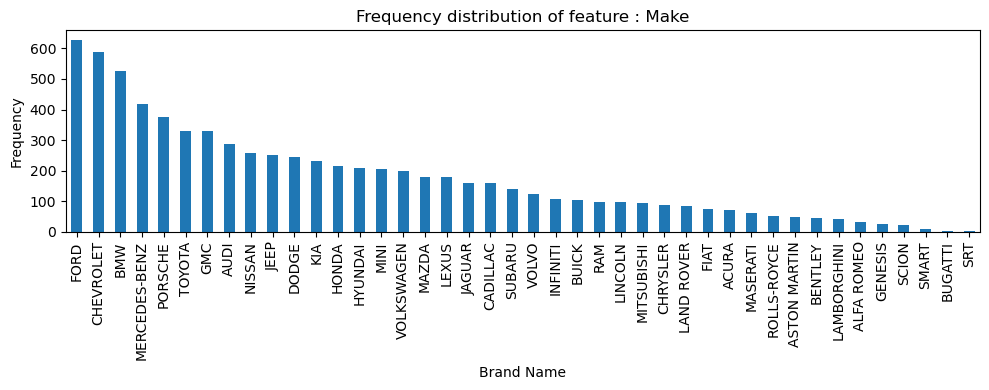

In [23]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(data.Make.value_counts())))
plt.figure(figsize=(10,4));
data.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("Brand Name", fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Feature-2: Model**

Top 20 car models out of total 2053 car models
-------------  --
F-150 FFV 4X4  32
F-150 FFV      32
MUSTANG        27
FOCUS FFV      24
SONIC          20
SONIC 5        20
F-150 4X4      20
F-150          20
ACCORD         19
COMPASS        19
JETTA          19
ATS            19
TACOMA 4WD     19
SILVERADO 4WD  18
FORTE 5        18
SILVERADO      18
CAMARO         18
SIERRA 4WD     18
COROLLA        18
SIERRA         18
-------------  --


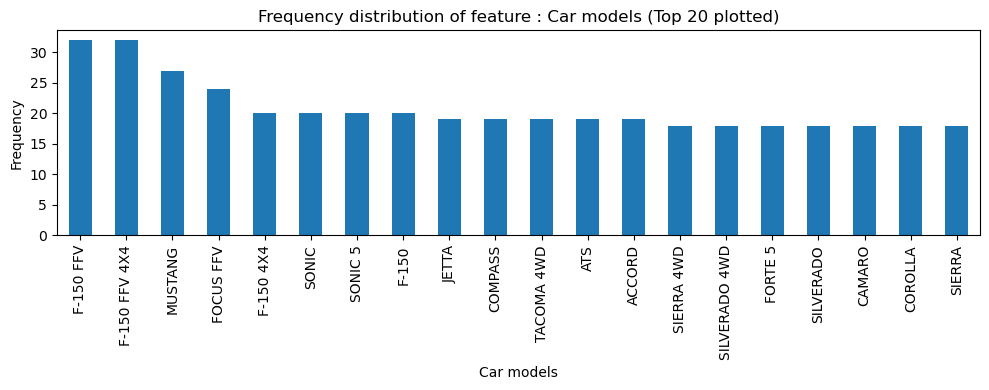

In [24]:
print(f"Top 20 car models out of total {data.Model.nunique()} car models")
print(tabulate(pd.DataFrame(data.Model.value_counts().sort_values(ascending=False)[:20])))

plt.figure(figsize=(10,4));
data.groupby("Model")["Model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature : Car models (Top 20 plotted)", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("Car models", fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Feature-3: Vehicle Class**

Vehicle Class
------------------------  ----
SUV - SMALL               1217
MID-SIZE                  1133
COMPACT                   1022
SUV - STANDARD             735
FULL-SIZE                  639
SUBCOMPACT                 606
PICKUP TRUCK - STANDARD    538
TWO-SEATER                 460
MINICOMPACT                326
STATION WAGON - SMALL      252
PICKUP TRUCK - SMALL       159
MINIVAN                     80
SPECIAL PURPOSE VEHICLE     77
VAN - PASSENGER             66
STATION WAGON - MID-SIZE    53
VAN - CARGO                 22
------------------------  ----


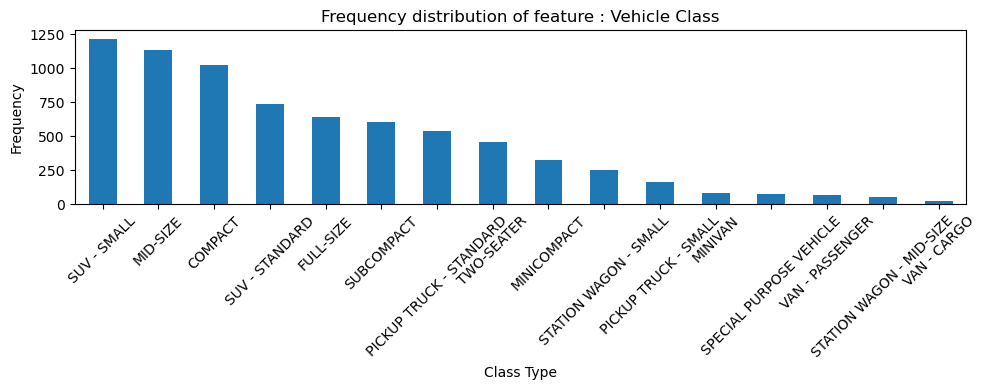

In [25]:
print("Vehicle Class")
print(tabulate(pd.DataFrame(data["Vehicle Class"].value_counts())))

plt.figure(figsize=(10,4));
data.groupby("Vehicle Class")["Vehicle Class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("Class Type", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Feature-4: Transmissions**

Transmission
---------------------------  ----
Automatic with Select Shift  3127
Automatic                    1851
Manual                       1185
Automated Manual              646
Continuously Variable         576
---------------------------  ----


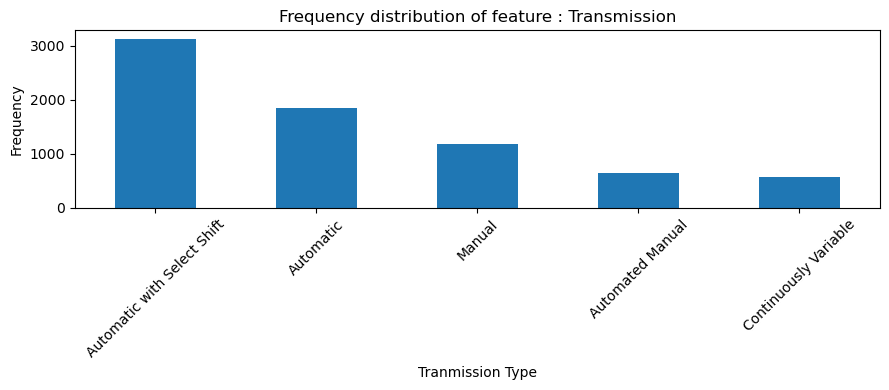

In [26]:
print("Transmission")
print(tabulate(pd.DataFrame(data.Transmission.value_counts())))

plt.figure(figsize=(9,4));
data.groupby("Transmission")["Transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Transmission", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel("Tranmission Type", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Feature-5: Fuel Type**

Fuel Type
----------------  ----
Regular Gasoline  3637
Premium Gasoline  3202
Ethanol(E85)       370
Diesel             175
Natural Gas          1
----------------  ----


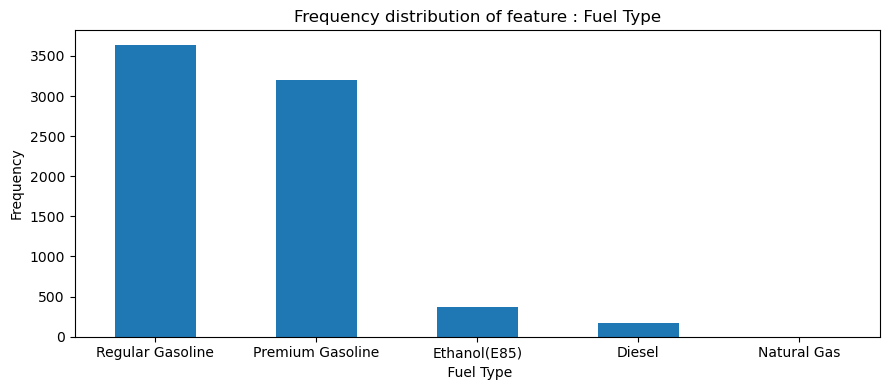

In [27]:
print("Fuel Type")
print(tabulate(pd.DataFrame(data["Fuel Type"].value_counts())))

plt.figure(figsize=(9,4));
data.groupby("Fuel Type")["Fuel Type"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Fuel Type", fontsize=12)
plt.ylabel("Frequency", fontsize=10)
plt.xlabel(" Fuel Type", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights:**
1. There are 42 car brands. Frequency distribution of brands shows:

Ford-628,Chevrolet-588 are the most dominating with higher frequencies.

Whereas Smart-7, Bugati-3 and SRT-2 have the lowest frequencies.

2. Frequency distribution based upon Car size:

SUV-Small:1217, MID-Size: 1133 cars have the most frequency on roads.

3. Frequency distribution based upon Transmission type:

Automatic with Select Shift-3127 (highest)

Continuously Variable Transmission-576 (lowest).

4. Frequency distribution based upon vehicle type:

Cars which run on Gasoline: Regular-3637; Premium-3202 is the most common vehicle type.

5. Cars on Diesel-175 are very low in frequency. Cars on Natural Gases-1.

# **Variation in CO2 emissions**

**Feature-1: Make**

Text(0, 0.5, 'CO2 Emissions(g/km)')

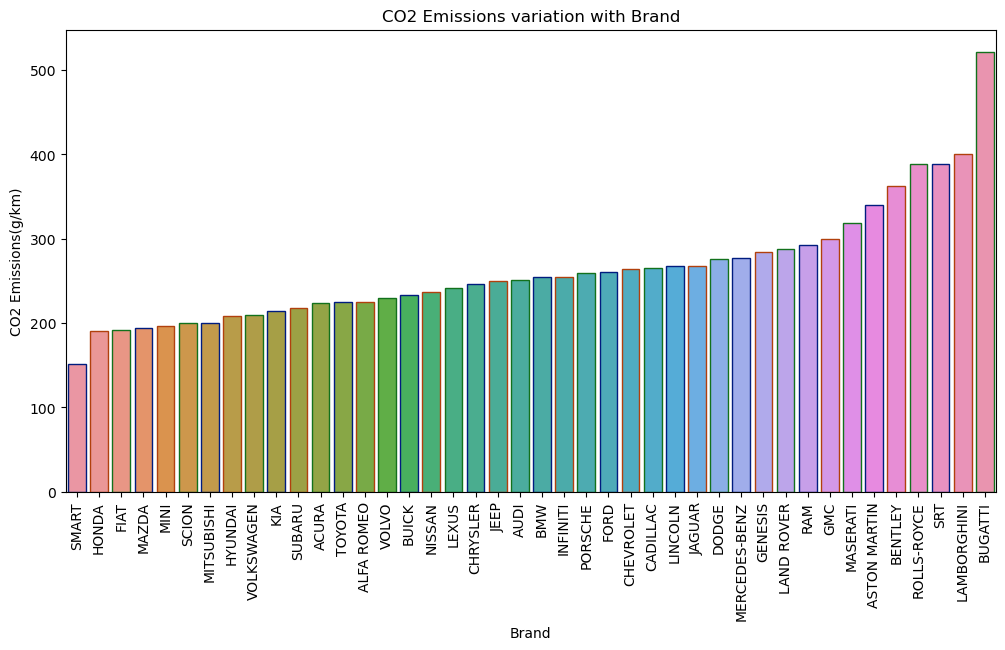

In [28]:
CO2_make = data.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x = "Make",y="CO2 Emissions(g/km)",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Brand', fontsize=12)
plt.xlabel('Brand', fontsize=10)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=10)

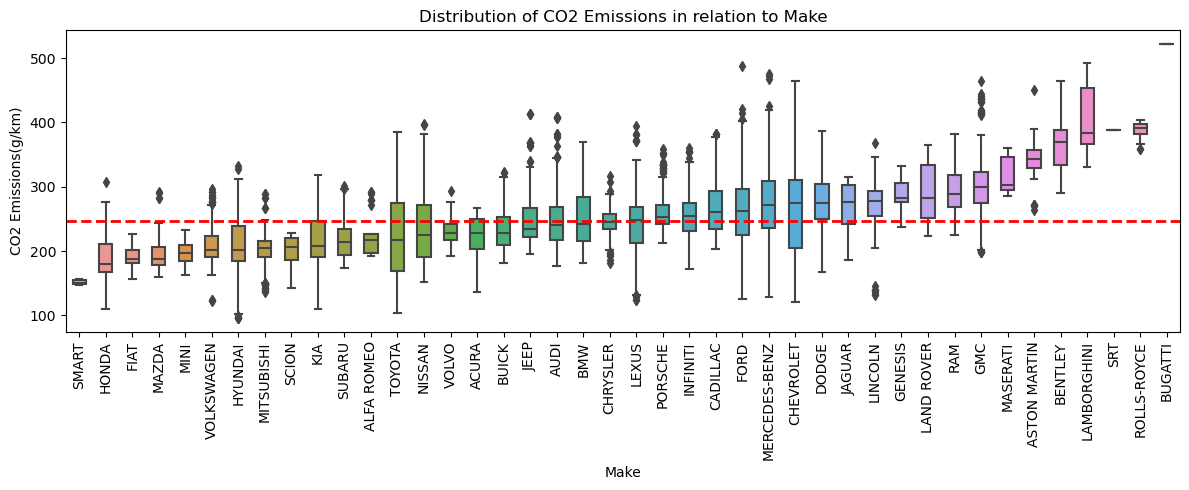

In [29]:
plt.figure(figsize=(12,5))
order = data.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=10)
plt.ylabel("CO2 Emissions(g/km)", fontsize=10)
plt.axhline(data["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**Insights:**
From both the bar graph and the box plot:
1. Average CO2 emissions of cars belonging to Bugatti is the highest and SMART has the lowest emissions.
2. The red line represents the sample mean of CO2 emissions.
3. Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.

**Feature-2: Vehicle Class**

Text(0, 0.5, 'CO2 Emissions(g/km)')

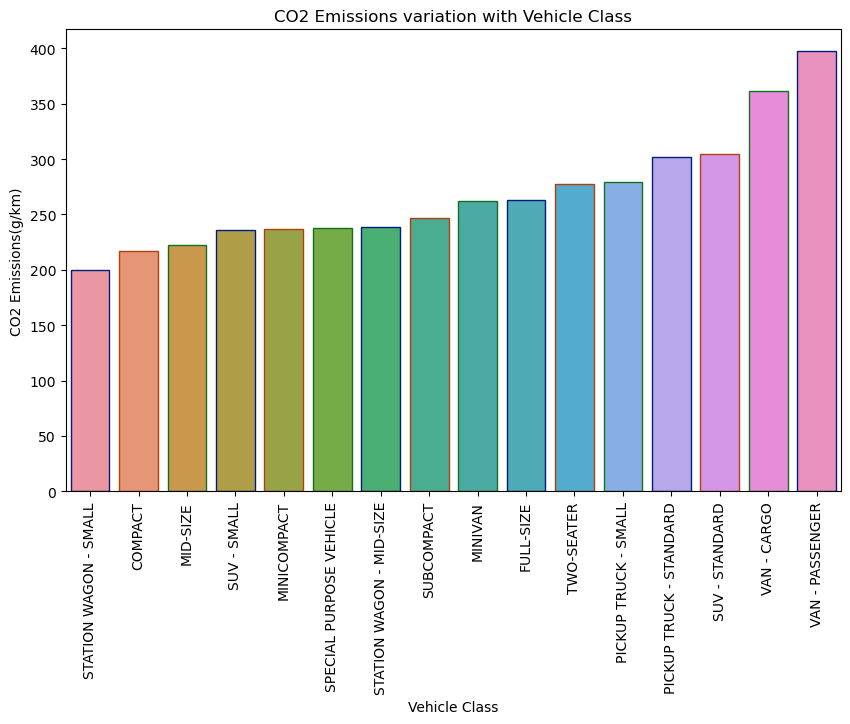

In [30]:
CO2_class = data.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x = "Vehicle Class",y="CO2 Emissions(g/km)",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Vehicle Class', fontsize=12)
plt.xlabel('Vehicle Class', fontsize=10)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=10)

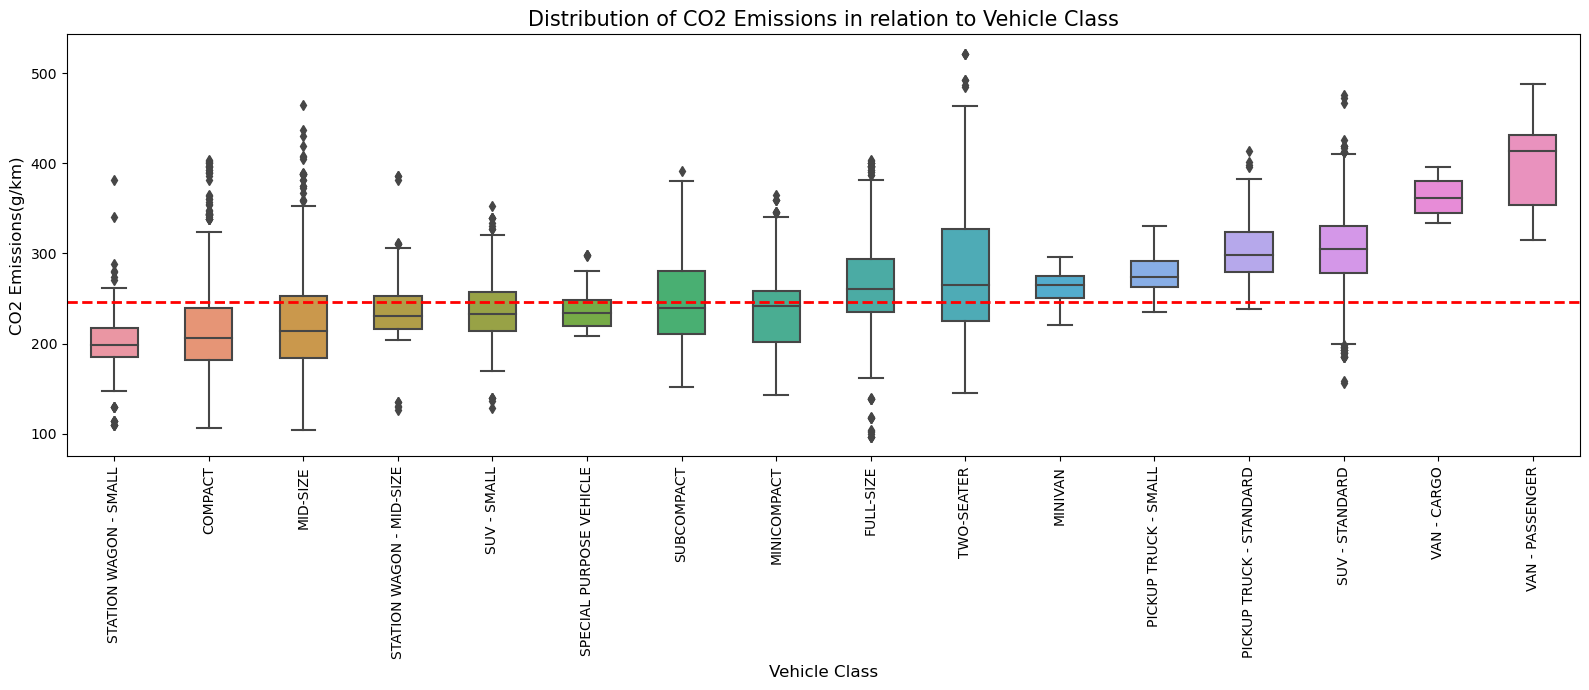

In [31]:
plt.figure(figsize=(16,7))
order = data.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(data["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**Insights:**
1. The vehicle of class VAN-Passenger followed by VAN-Cargo has the highest CO2 emissions among all with no outliers. Station Wagon-Small has the lowest CO2 emissions with some outliers above and below.
2. Among the 16 vehicle classes, 8 of them have a median CO2 emissions less than sample median of CO2 emissions and the other 8 have a higher median than 250g/km.
3. This shows that larger vehicles like trucks, etc. emit more than the smaller and midsized vehicles.

**Feature-3: Transmission**

Text(0, 0.5, 'CO2 Emissions(g/km)')

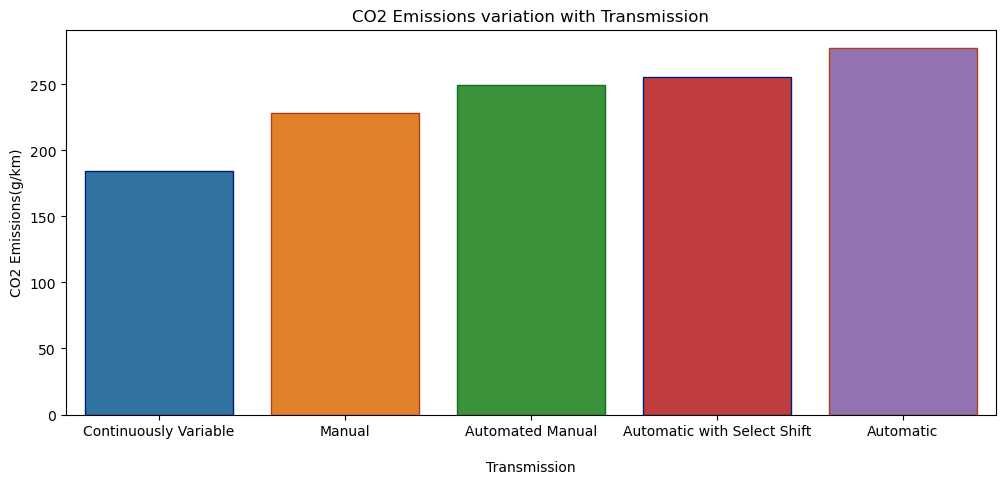

In [32]:
CO2_transmission = data.groupby(["Transmission"])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x = "Transmission",y="CO2 Emissions(g/km)", data = CO2_transmission,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=12)
plt.xlabel('\nTransmission', fontsize=10)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=10)

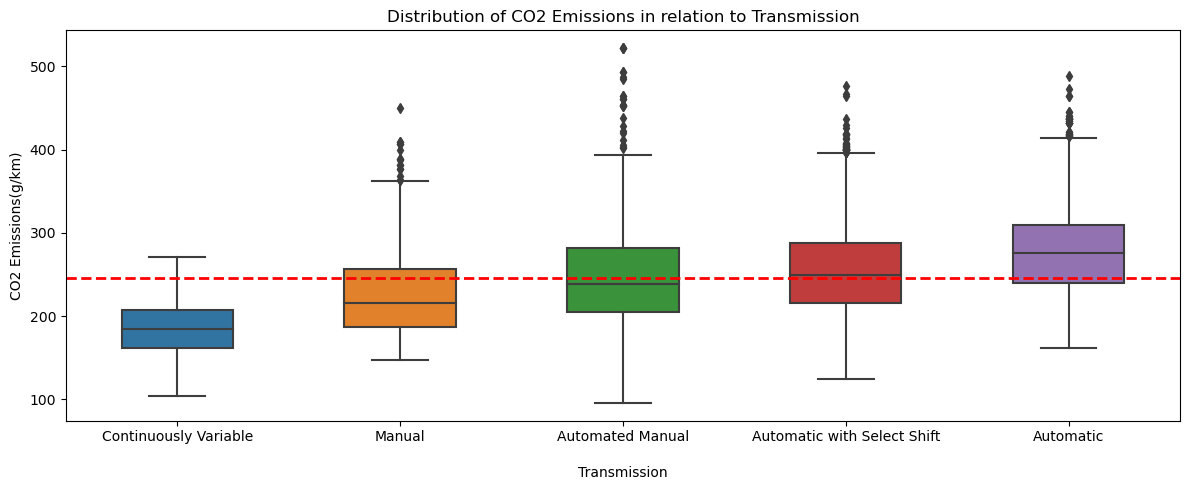

In [33]:
plt.figure(figsize=(12,5))
order = data.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=12)
plt.xlabel("\nTransmission", fontsize=10)
plt.ylabel("CO2 Emissions(g/km)", fontsize=10)
plt.axhline(data["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**Insights:**

1. Vehicles with Automatic transmission exhibit highest CO2 emissions and vehicle with Continuously Variable Transmission shows the lowest CO2 emissions.
2. Median CO2 emissions of Automated Manual and Automatic with Select Shift vehicles is almost similar to that of sample median CO2 emissions.

**Feature-4: Fuel Type**

Text(0, 0.5, 'CO2 Emissions(g/km)')

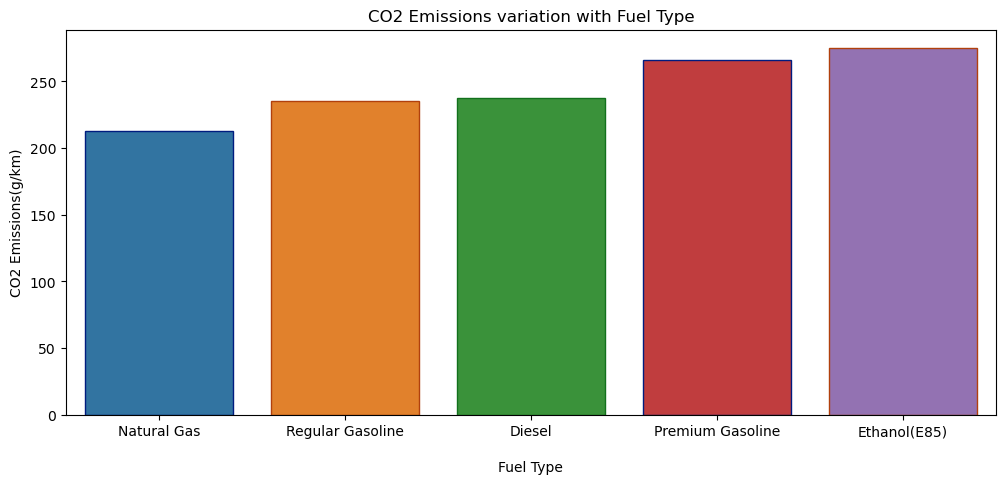

In [34]:
CO2_fuel_type = data.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x = "Fuel Type",y="CO2 Emissions(g/km)",data = CO2_fuel_type,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=12)
plt.xlabel('\nFuel Type', fontsize=10)
plt.ylabel('CO2 Emissions(g/km)', fontsize=10)

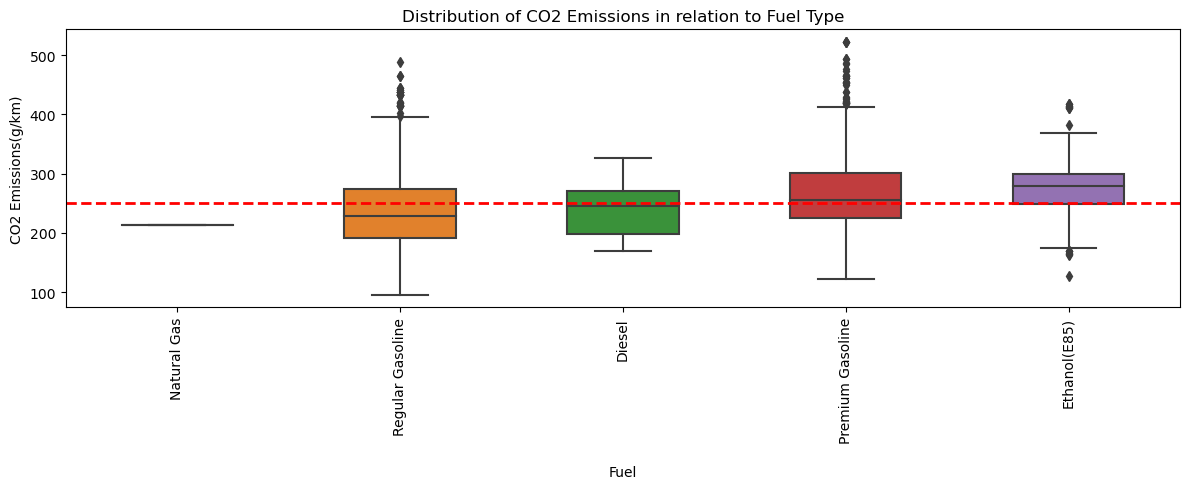

In [35]:
plt.figure(figsize=(12,5))
order = data.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=10)
plt.ylabel("CO2 Emissions(g/km)", fontsize=10)
plt.axhline(data["CO2 Emissions(g/km)"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**Insights:**

1. Cars running on Ethanol(E85) has the highest CO2 emissions with almost all the values hisger than the sample median CO2 emissions.
2. Natural Gas has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Other than that Regular Gasoline has the lowest CO2 emissions with almost 75% values less than sample median.
3. The median CO2 emissions of fuel type Premiuim Gasoline and Diesel has almost similar median to that of the sample median.

# **Analysing the Numerical Values**

In [36]:
#Descriptive Statistics
stat = data.describe().T.drop(["count"], axis=1)
stat = pd.concat([stat, data.skew()], axis=1)
stat.columns = ["mean", "std", "min", "25%", "median", "75%", "max", "skew"]
cols = ["mean", "25%", "median", "75%", "std", "skew", "min", "max"]
stat = stat[cols]
print(tabulate(stat, headers="keys", floatfmt=".2f"))

                                    mean     25%    median     75%    std    skew    min     max
--------------------------------  ------  ------  --------  ------  -----  ------  -----  ------
Engine Size(L)                      3.16    2.00      3.00    3.70   1.35    0.81   0.90    8.40
Cylinders                           5.62    4.00      6.00    6.00   1.83    1.11   3.00   16.00
Fuel Consumption City (L/100 km)   12.56   10.10     12.10   14.60   3.50    0.81   4.20   30.60
Fuel Consumption Hwy (L/100 km)     9.04    7.50      8.70   10.20   2.22    1.08   4.00   20.60
Fuel Consumption Comb (L/100 km)   10.98    8.90     10.60   12.60   2.89    0.89   4.10   26.10
Fuel Consumption Comb (mpg)        27.48   22.00     27.00   32.00   7.23    0.98  11.00   69.00
CO2 Emissions(g/km)               250.58  208.00    246.00  288.00  58.51    0.53  96.00  522.00


**Insights:**

1. The target variable: CO2 Emissions ranges from 96 and 522.
2. Mean CO2 emissions = 250.58 and median = 246.
3. 25% of the sample points has CO2 emissions within 208 and 75% has within 288.
4. All the features are positively skewed.
5. Cylinders and Fuel Consumption Hwy (L/100 km) seems significantly more skewed than the other features.
6. CO2 Emissions(g/km) is the least skewed feature.
7. Other than the regressor feature, among the predictors Engine Size(L) and Fuel Consumption City (L/100 km) are the least skewed features.


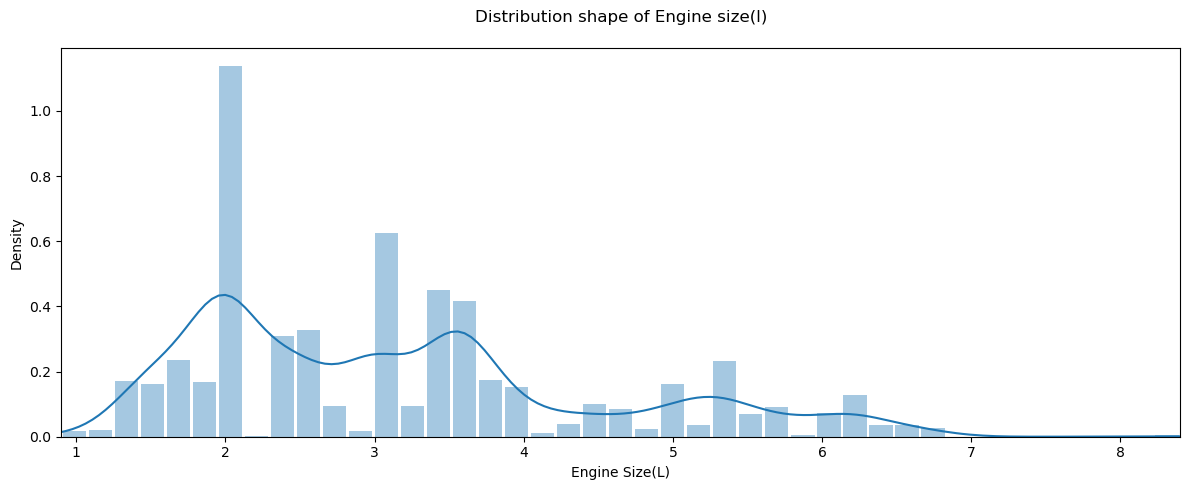

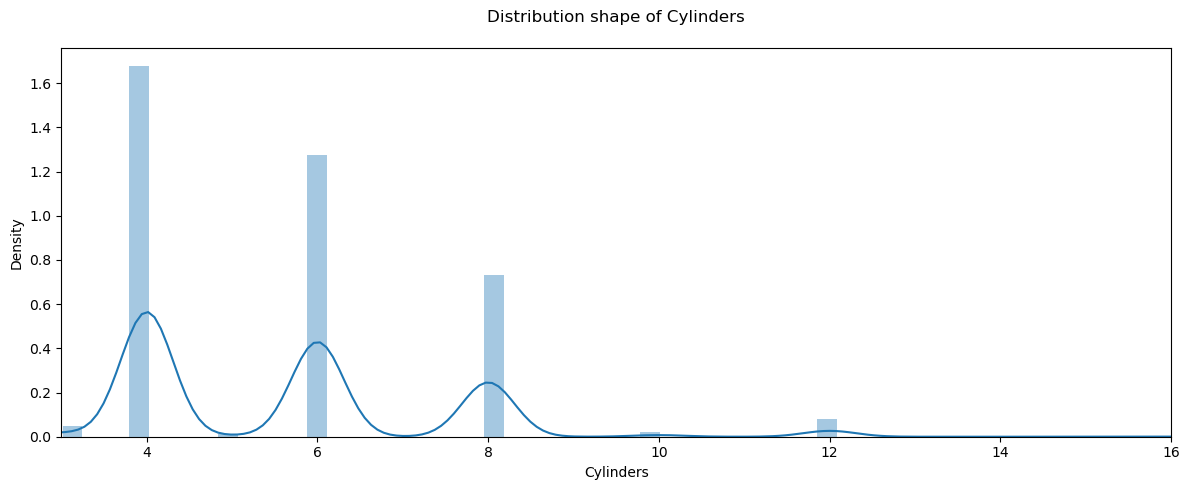

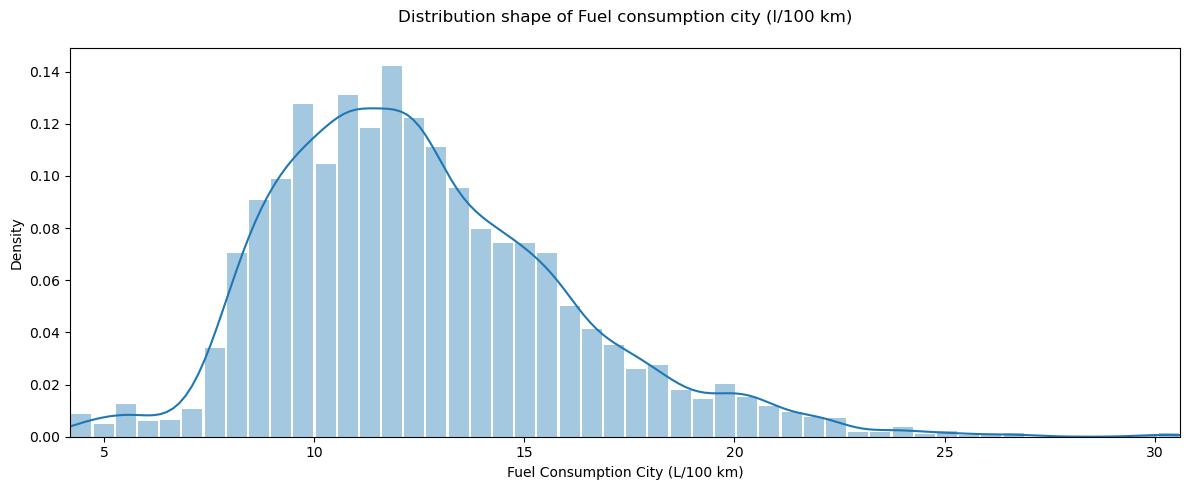

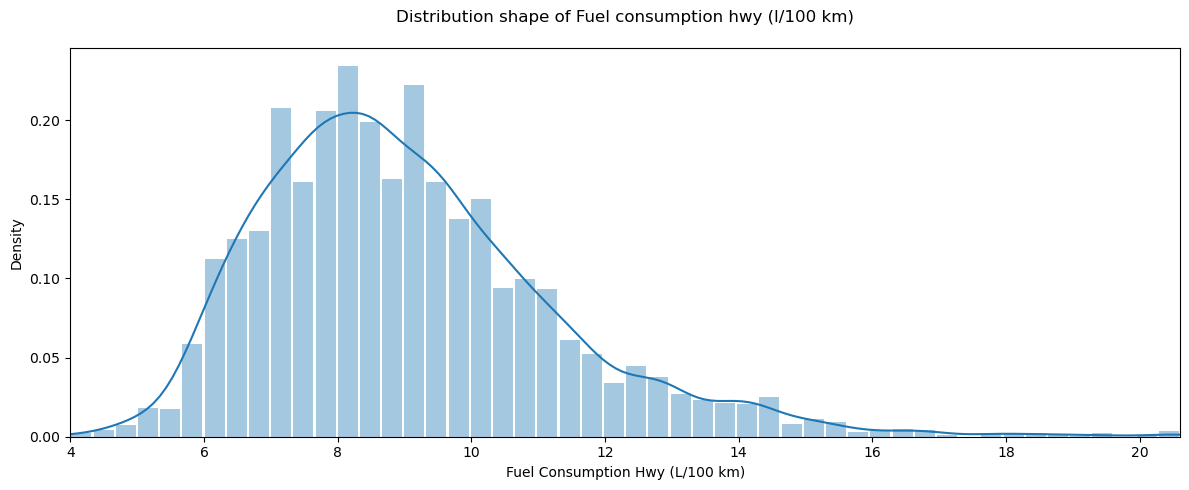

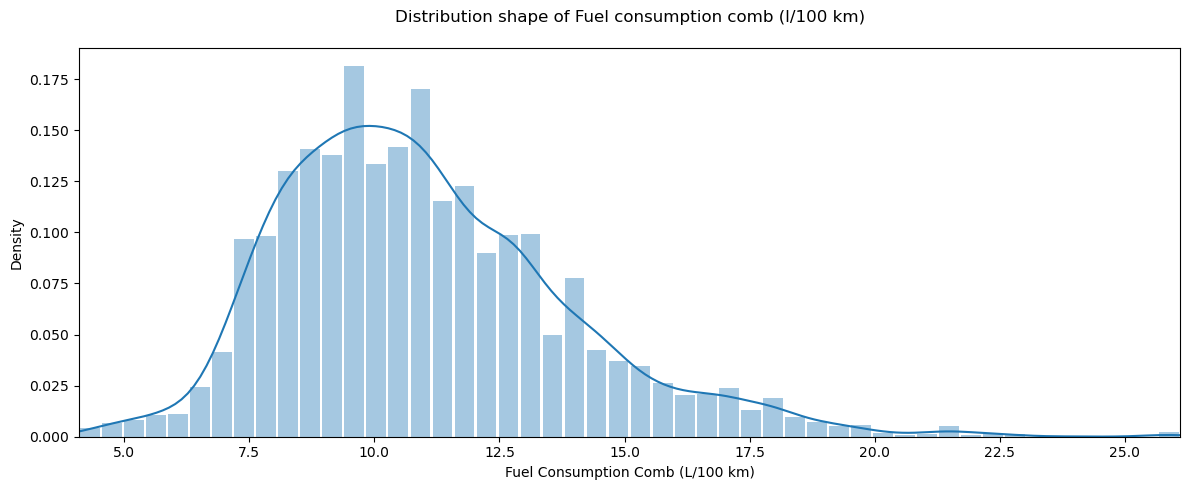

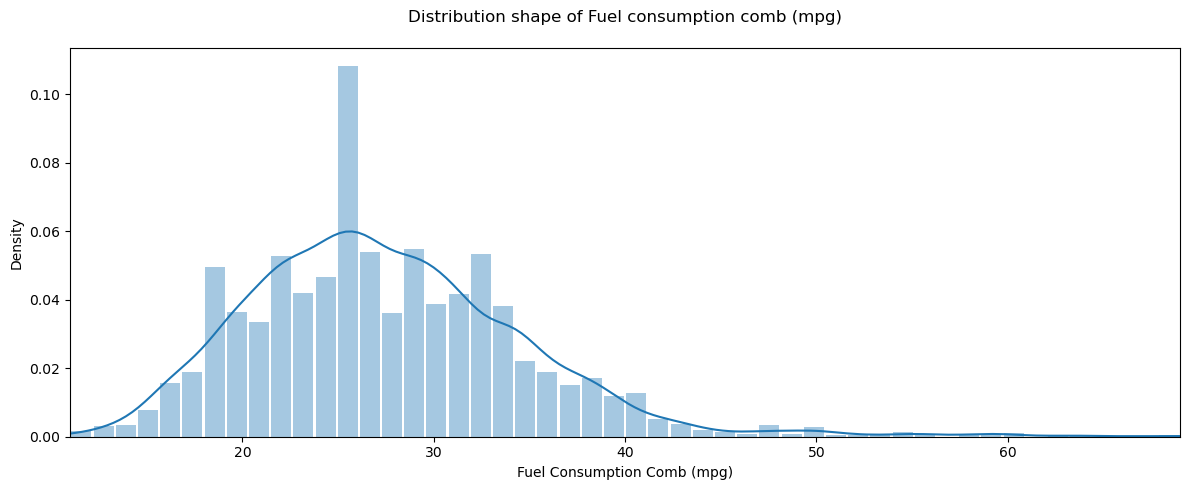

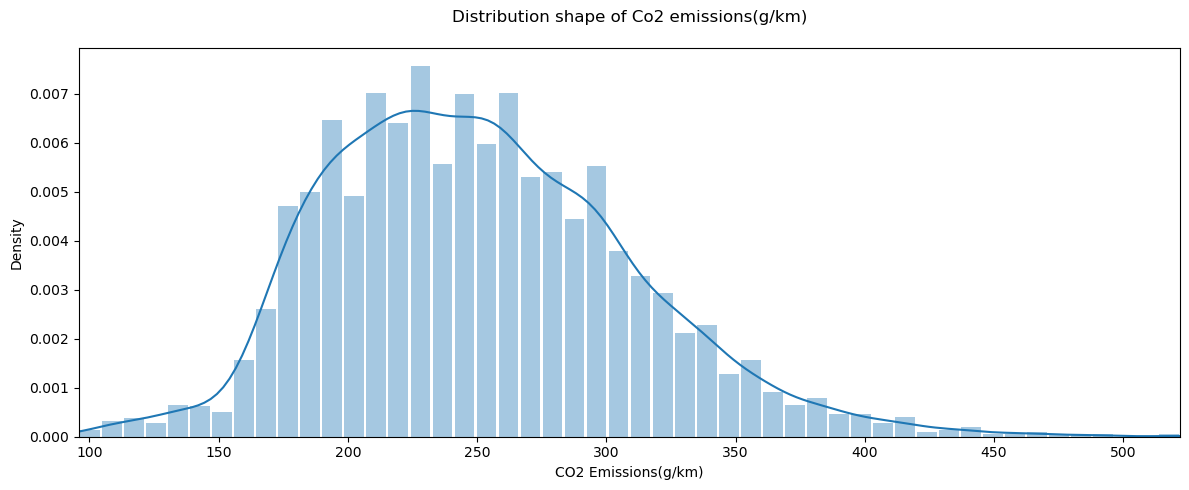

In [37]:
#To check the shape of the distribution and skewness of each feature
for feature in data.select_dtypes("number").columns:

    plt.figure(figsize=(12,5))
    sns.distplot(data[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(data[feature].min(), data[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=12)
    plt.tight_layout()
    plt.show()

**Insights:**
1. Cylinder feature has discrete values so it is the most positively skewes distribution.
2. CO2 Emission in turn is the one which looks more similar to a normally distributed curve than the others.

To visualize the distribution of the dependent varibale using a Frequency Distribution plot and a Box plot

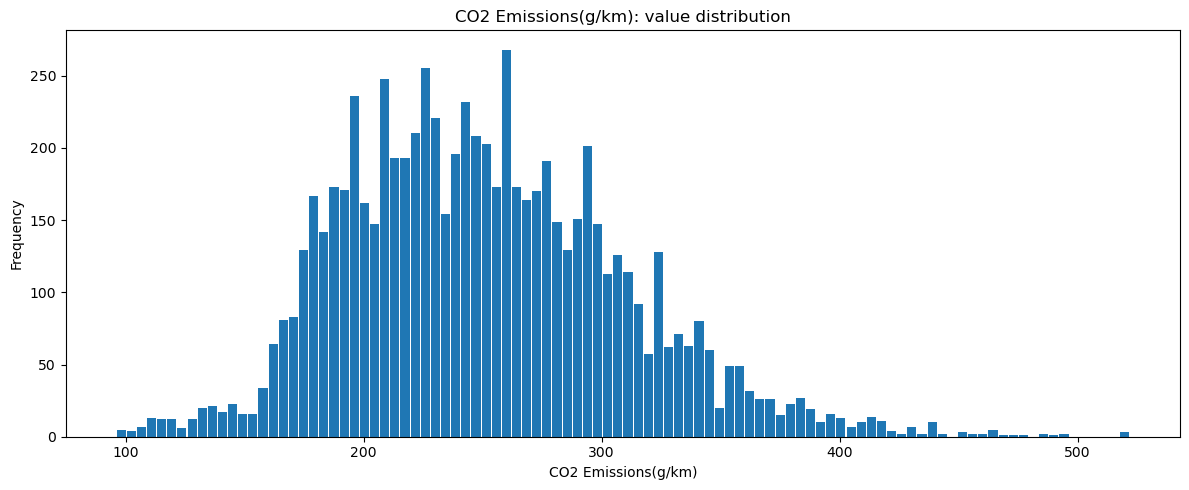

In [38]:
plt.figure(figsize=(12,5))
data["CO2 Emissions(g/km)"].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2 Emissions(g/km): value distribution")
plt.xlabel("CO2 Emissions(g/km)")
plt.tight_layout()
plt.show()

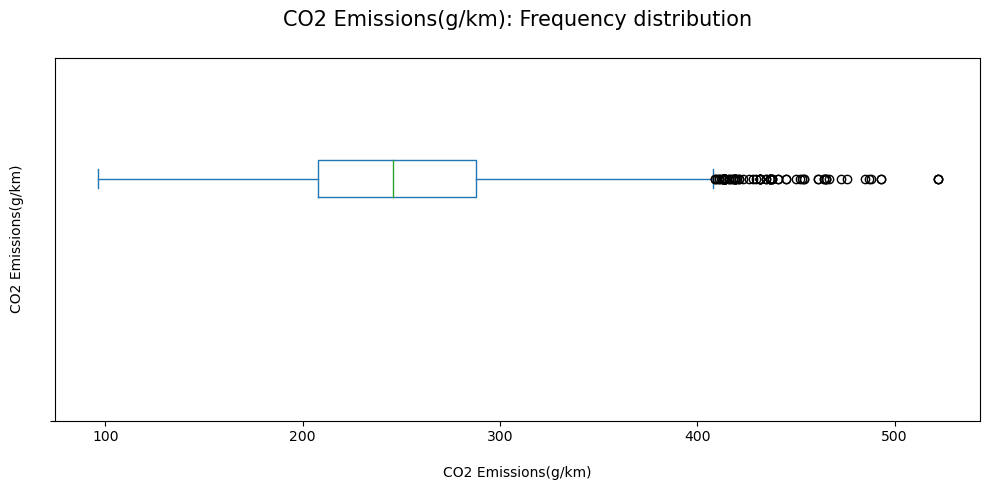

In [39]:
plt.figure(figsize=(10,5))
data["CO2 Emissions(g/km)"].plot(kind="box", vert=False)
plt.title("CO2 Emissions(g/km): Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions(g/km)")
plt.yticks([0], [''])
plt.ylabel("CO2 Emissions(g/km)\n", rotation=90)
plt.tight_layout()
plt.show()

**Insights:**

From the Box plot we infer:

1. Minimum vale of the CO2 emission = 96 approx.
2. Median CO2 emission = 246.
3.  25% of the samples have CO2 emission between 96 and 208.
4.  75% of the samples have CO2 emission between 96 and 288.
5. No outliers in the lower half but there are outliers in the upper half.
6. Maximum CO2 emissions observed is 522 which is an outlier.
7. Distribution of CO2 emissions is positively skewed.

# **CORRELATION MATRIX**

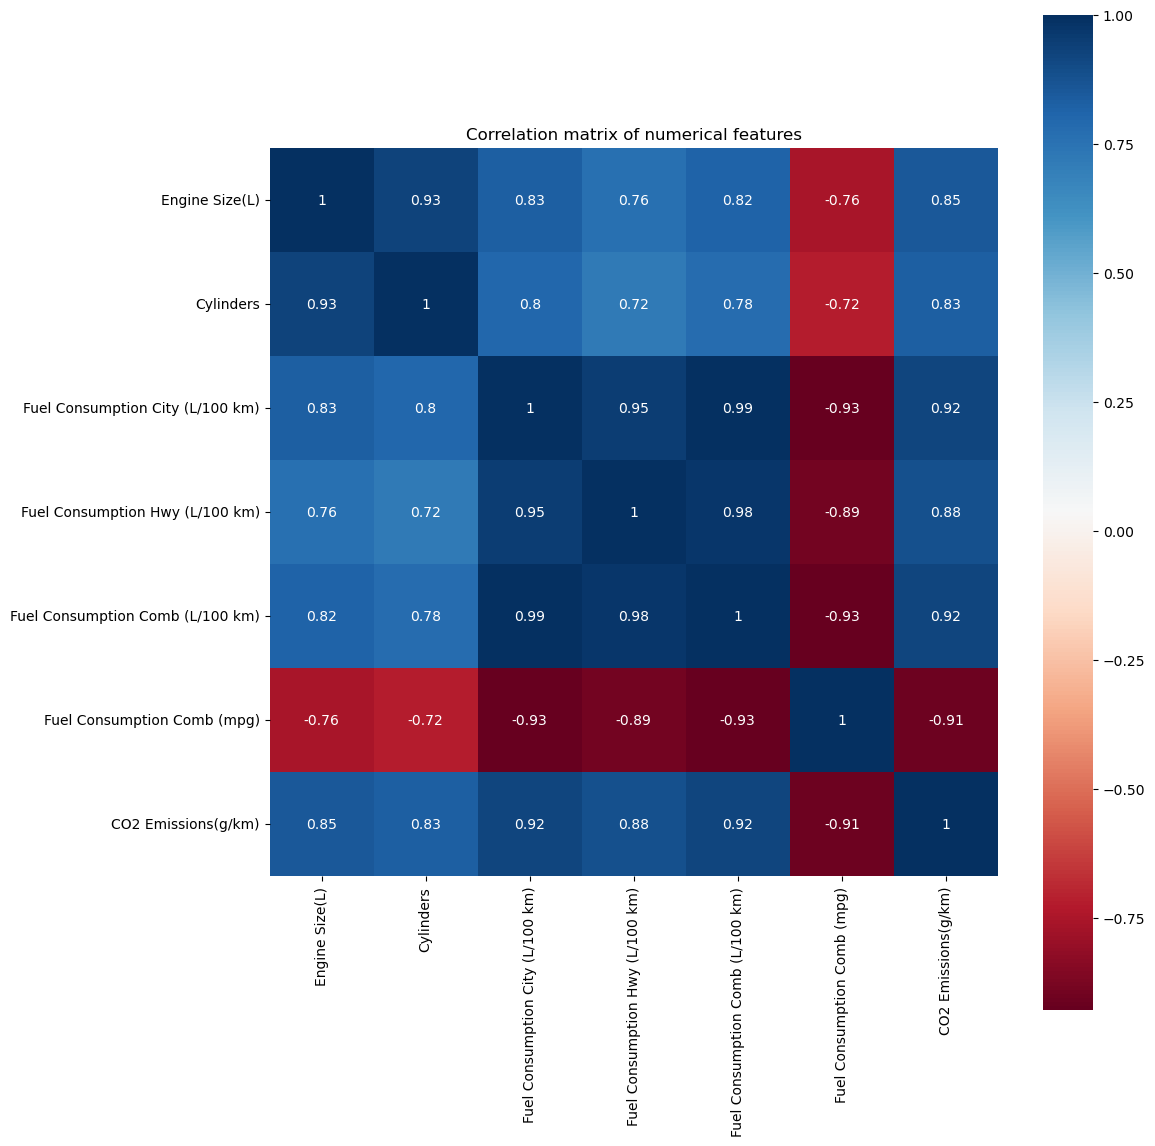

In [40]:
corr = data.corr()
plt.subplots(figsize=(12,12));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

**Insights:**

1. Fuel Consumption Comb (mpg) is negatively correlated to all the features.
2. All the other features are postively correlated with each other.
3. Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation of 0.99 and 0.98 with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.
4. Our dependent variable CO2 Emissions(g/km) has highest positive correlation of 0.92 with Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) and strong negative correlation of -0.91 with Fuel Consumption Comb (mpg).

**Correlation of independent features with dependent variable**

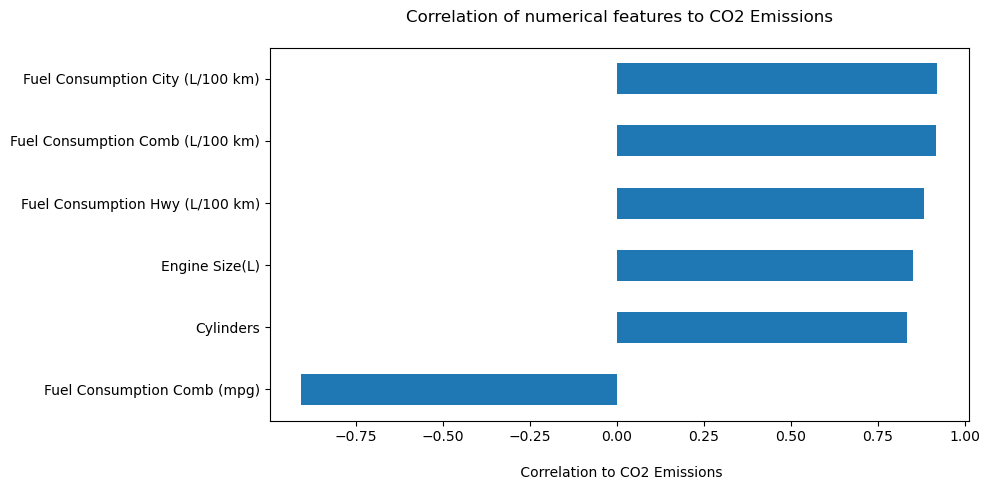

In [41]:
plt.figure(figsize=(10,5))
corr["CO2 Emissions(g/km)"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=12)
plt.xlabel("\n Correlation to CO2 Emissions")
plt.tight_layout()
plt.show()

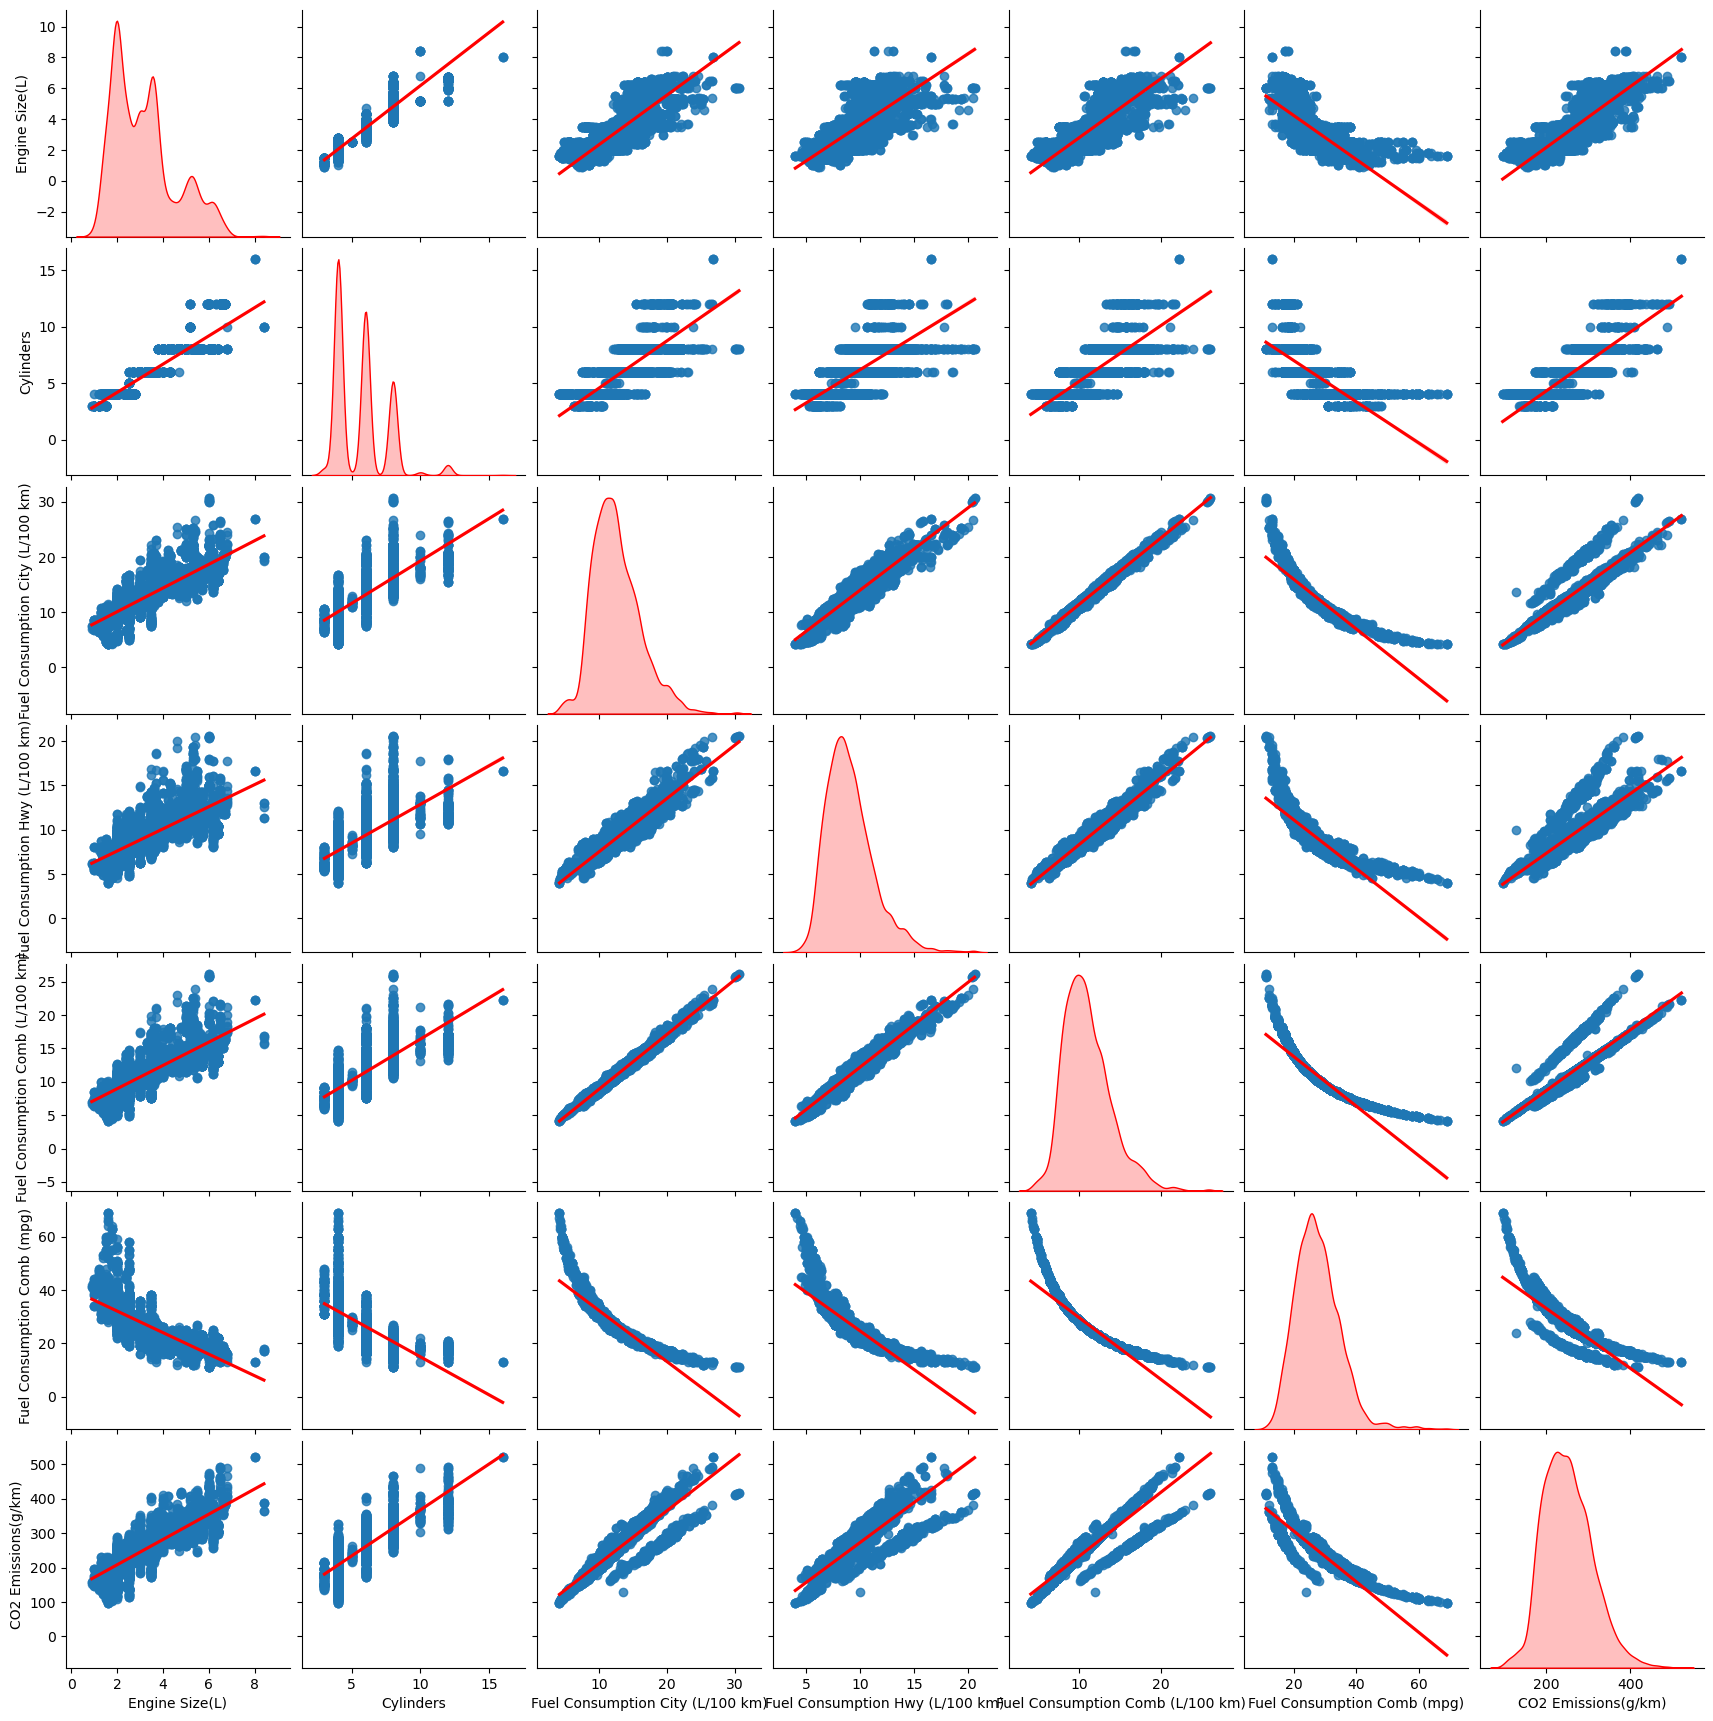

In [42]:
sns.pairplot(data, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

# **Variation in CO2 emissions with different features**

**Feature-1 : Cylinders**

Text(0, 0.5, 'CO2 Emissions(g/km)')

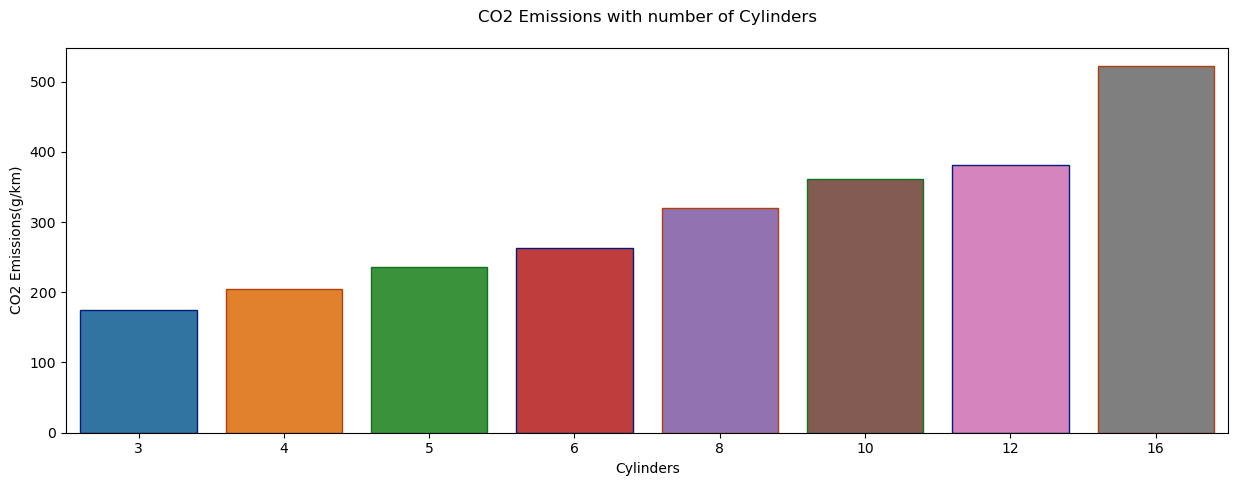

In [43]:
CO2_cylinder = data.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="CO2 Emissions(g/km)", data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=12)
plt.xlabel('Cylinders', fontsize=10)
plt.ylabel('CO2 Emissions(g/km)', fontsize=10)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

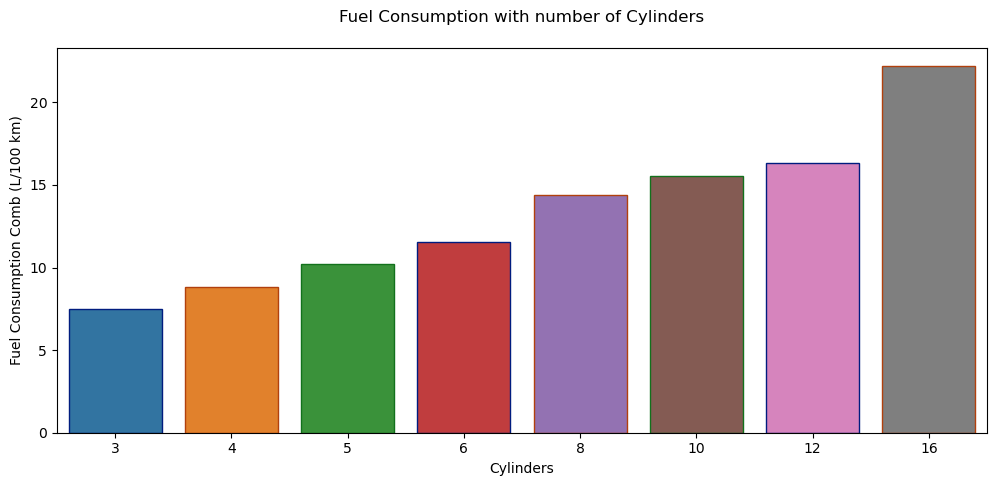

In [44]:
fuel_cylinder = data.groupby(['Cylinders'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x = "Cylinders",y="Fuel Consumption Comb (L/100 km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=12)
plt.xlabel('Cylinders', fontsize=10)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=10)

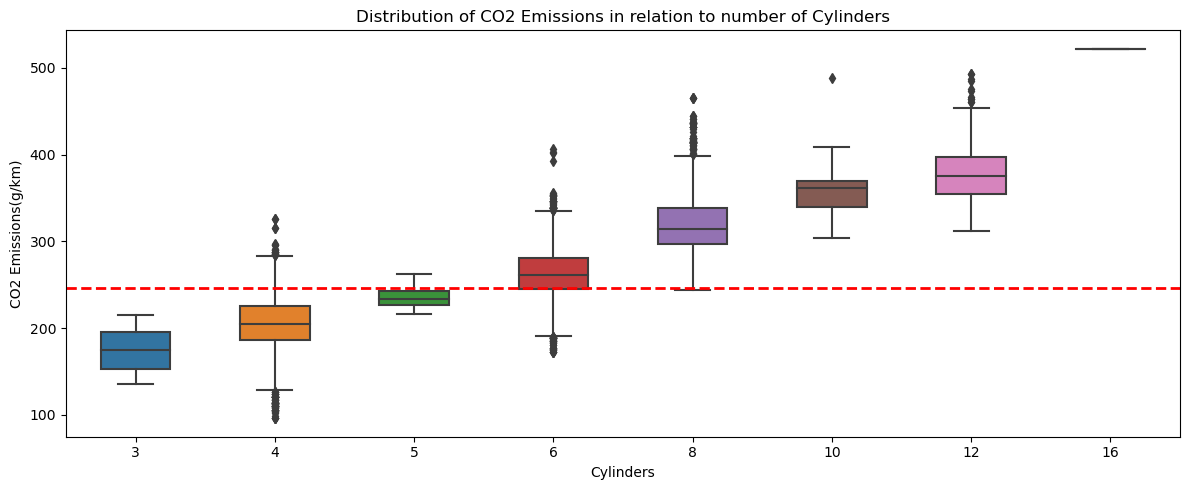

In [45]:
plt.figure(figsize=(12,5))
order = data.groupby("Cylinders")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=12)
plt.xlabel("Cylinders", fontsize=10)
plt.ylabel("CO2 Emissions(g/km)", fontsize=10)
plt.axhline(data["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**Insights:**

1. With increase in number of Cylinders, CO2 emissions also increase proportionally.
2. The same trend can be observed for Cylinder vs Combined Fuel Consumption. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so with increase in number of cylinders, CO2 emissions also increases.
3. Vehicles with number of cylinders more than 5 has a median CO2 emissions greater than the sample median CO2 emissions.
4. Vehicles with less than 6 cylinder have almost all the sample with median CO2 emissions less than sample median.
5. Whereas vehicles with more than 5 cylinders have almost 100% sample with median CO2 emissions more than the sample median.

**Feature : Engine Size(L)**

Text(0, 0.5, 'CO2 Emissions(g/km)')

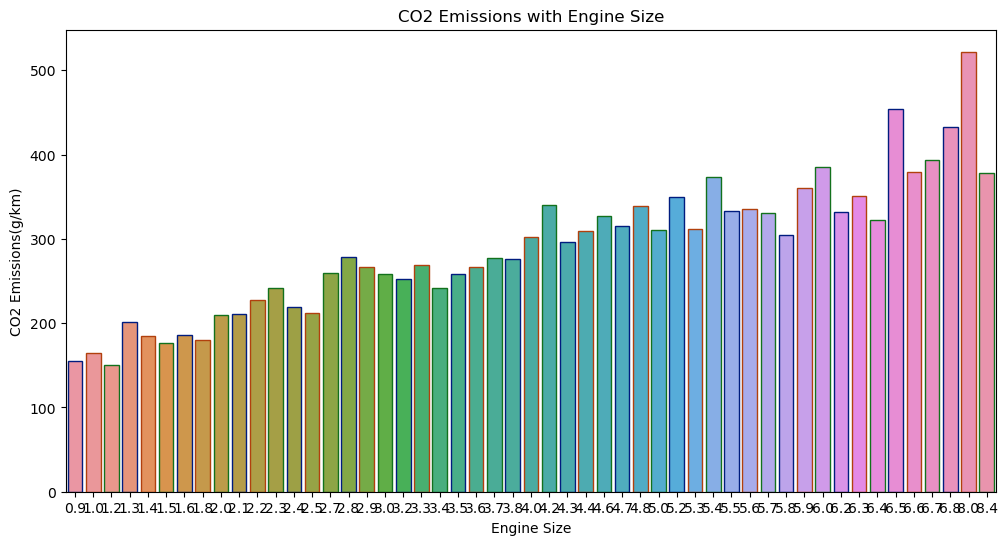

In [46]:
CO2_engine = data.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x = "Engine Size(L)",y="CO2 Emissions(g/km)", data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=12)
plt.xlabel('Engine Size', fontsize=10)
plt.ylabel('CO2 Emissions(g/km)', fontsize=10)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

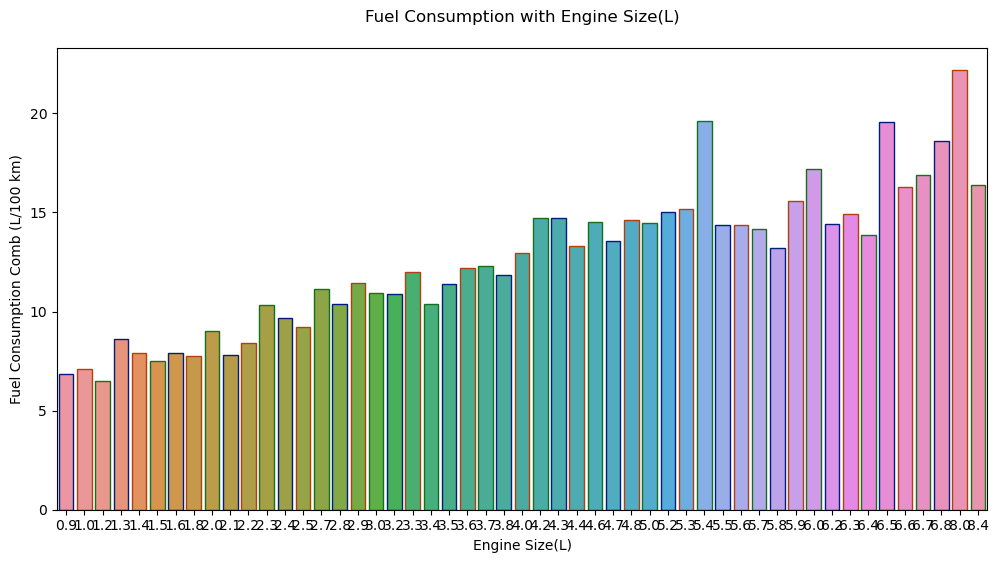

In [47]:
fuel_engine = data.groupby(['Engine Size(L)'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x = "Engine Size(L)", y="Fuel Consumption Comb (L/100 km)", data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=12)
plt.xlabel('Engine Size(L)', fontsize=10)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=10)

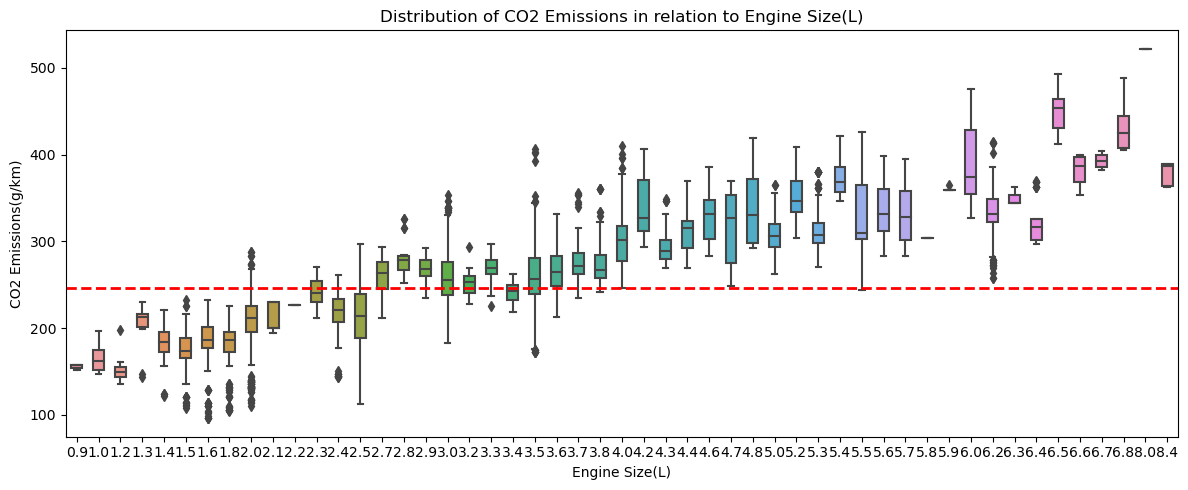

In [48]:
plt.figure(figsize=(12,5))
order = data.groupby("Engine Size(L)")["CO2 Emissions(g/km)"].median().index
sns.boxplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 12)
plt.xlabel("Engine Size(L)", fontsize = 10)
plt.ylabel("CO2 Emissions(g/km)", fontsize=10)
plt.axhline(data["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**Insights:**

1. With increase in Engine Size, CO2 emissions also increases.
2. The same trend can be observed for Engine Size vs Combined Fuel Consumption also. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so as Engine Size increases CO2 emissions also increases.
3. Vehicles with Engines Size more than 2.5L has a median CO2 emissions greater than or equal to the sample median CO2 emissions.

**Feature-3: Fuel Consumption City (L/100 km)**

Text(0, 0.5, 'CO2 Emissions(g/km)')

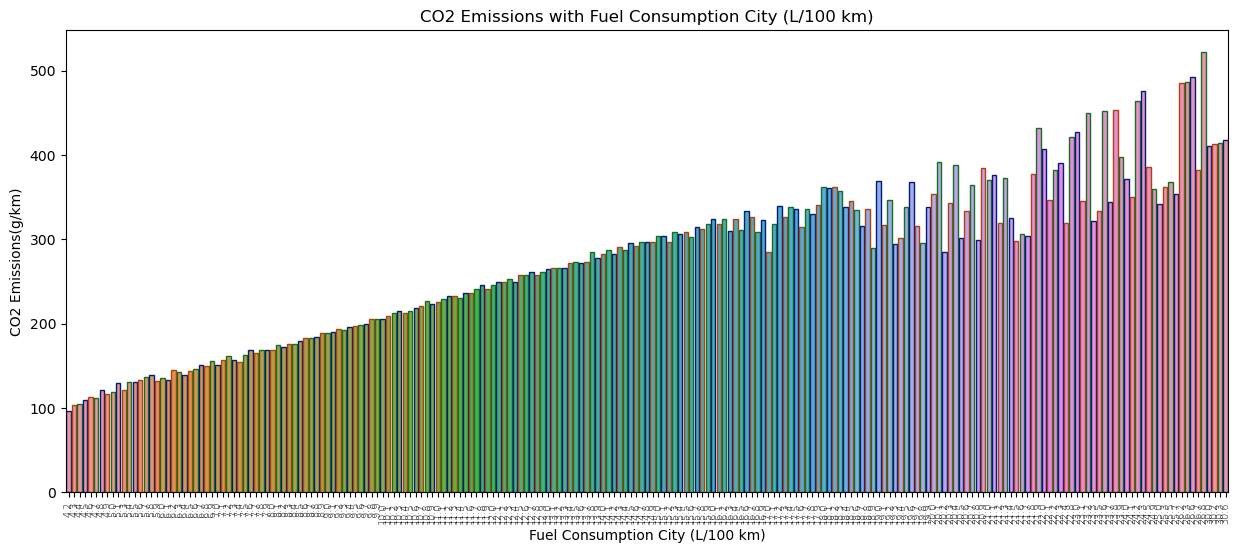

In [49]:
CO2_city = data.groupby(['Fuel Consumption City (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x = "Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=12)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=10)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=10)

**Feature-4 : Fuel Consumption Hwy (L/100 km)**

Text(0, 0.5, 'CO2 Emissions(g/km)')

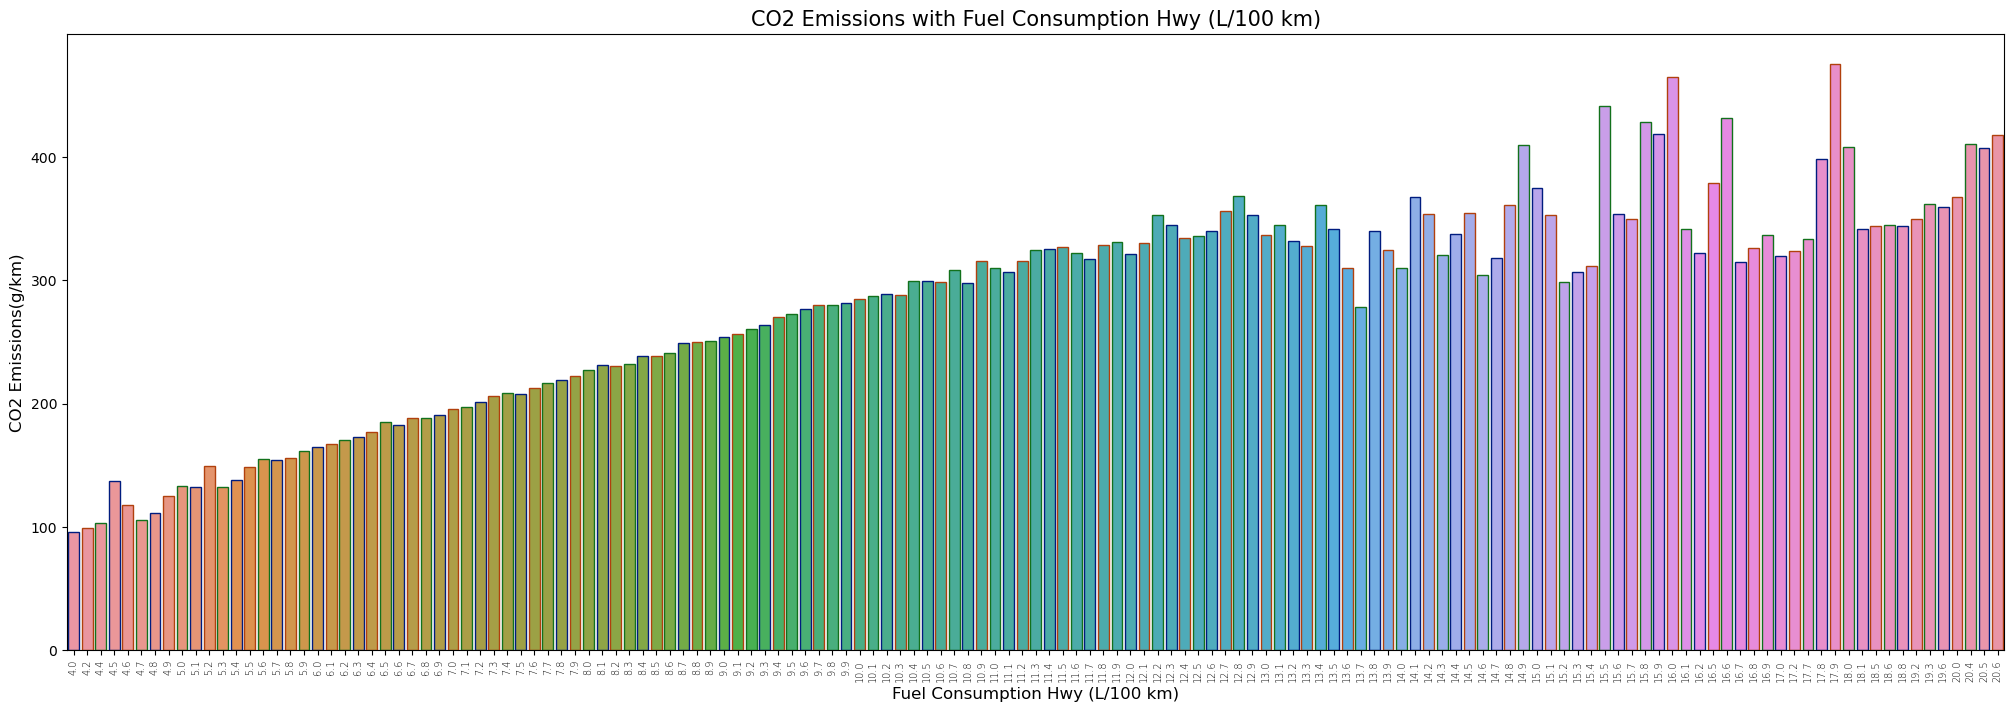

In [50]:
CO2_hw = data.groupby(['Fuel Consumption Hwy (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_hw,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

**Feature-5: Fuel Consumption (L/100km)**

Text(0, 0.5, 'CO2 Emissions(g/km)')

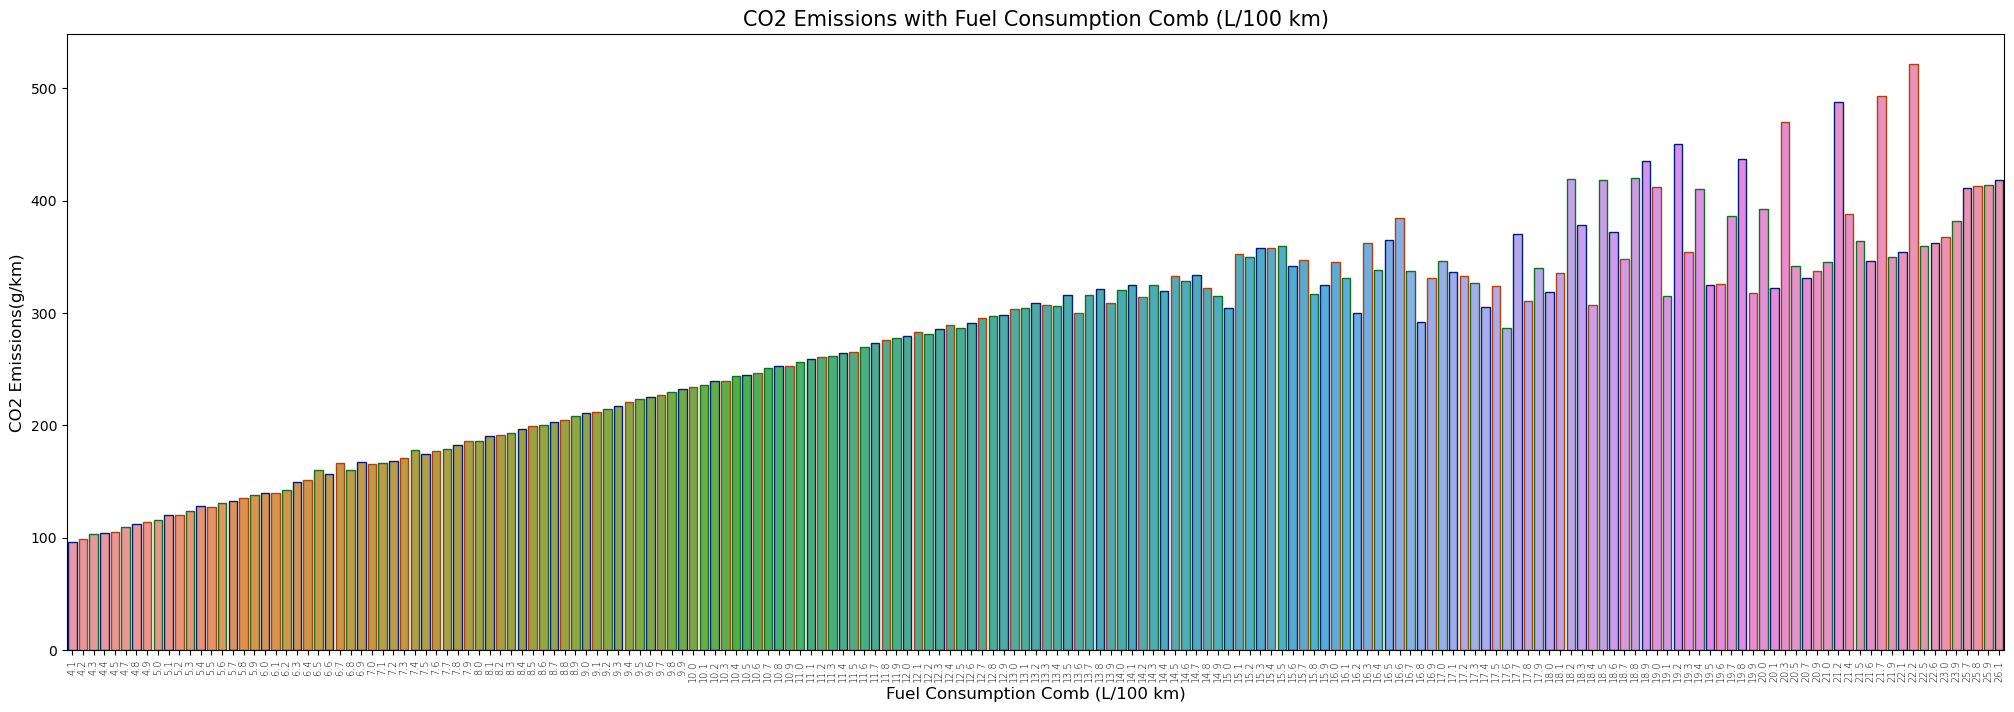

In [51]:
CO2_comb = data.groupby(['Fuel Consumption Comb (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

**Insights:**

1. With the increase in fuel consumption the CO2 emissions also increases.
2. From the plots we can see almost an linear increase in CO2 emissions with Fuel Consumption, as they are highly postively correlated.
3. The same trend can be observed in all the three features representing Fuel Consumption in (L/100 km).

**Feature : Fuel Consumption Comb (mpg)**

Text(0, 0.5, 'CO2 Emissions(g/km)')

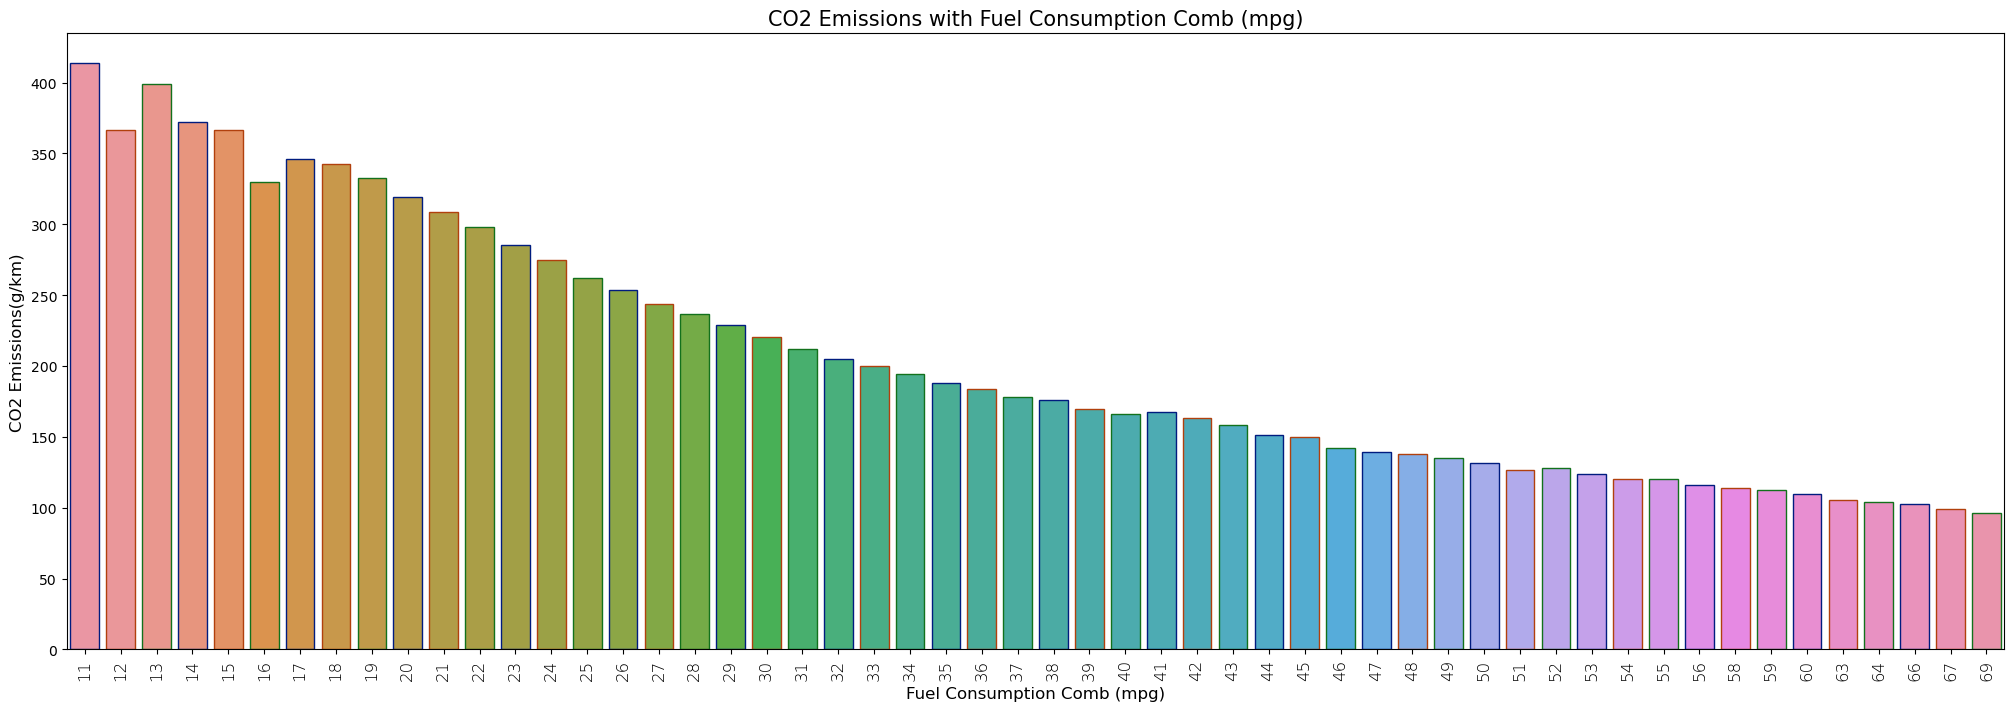

In [52]:
CO2_comb_mpg = data.groupby(['Fuel Consumption Comb (mpg)'])['CO2 Emissions(g/km)'].mean().reset_index()
plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)", data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

## **Conclusions:**
1. As infered from the correlation matrix that CO2 Emission and Fuel Consumption Comb(mpg) are strongly negatively correlated.
2. Fuel Consumption Comb(mpg) shows how many miles a car can go with one gallon of fuel. Less mile per gallon represents more fuel consumption. So it is logical to have negative correlation with CO2 emissions. So, as Fuel Consumption Comb(mpg) decreases, CO2 emissios increases.